In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir('data')

['Env_QH.csv',
 'micro_sud3.pkl',
 'AllPM_QH.csv',
 'micro_sud3_normalized.pkl',
 'AllNO2_QH.csv']

In [3]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()
df.head()

,index,date,PM_ref,PM_6182,PM_6179,PM_617B,PM25_6182,PM25_6179,PM25_617B,NO2_ref,NO2_61FD,NO2_61F0,NO2_61EF,temp,rh,tgrad,pressure,pluvio
0,15,2017-09-28 14:00:00,16.2,-1.178505,-1.137844,-1.134624,-1.183081,-1.128074,-1.148204,10.1,-0.392423,-0.621107,-0.419097,1.986031,-1.114144,-0.922393,0.315942,-0.150524
1,16,2017-09-28 14:15:00,9.6,-1.108262,-1.085060,-1.121956,-1.101652,-1.071229,-1.128278,9.9,-0.392423,-0.621107,-0.419097,2.057032,-1.123212,-0.977185,0.335134,-0.150524
2,17,2017-09-28 14:30:00,10.3,-1.178505,-1.169515,-1.257077,-1.176817,-1.167865,-1.252817,16.1,-0.392423,-0.621107,-0.419097,2.080699,-1.232038,-1.086769,0.315942,-0.150524
3,18,2017-09-28 14:45:00,9.4,-1.137530,-1.000606,-1.206407,-1.139235,-1.008700,-1.222928,10.9,-0.392423,-0.621107,-0.419097,2.009698,-1.259245,-0.812809,0.315942,-0.150524
4,19,2017-09-28 15:00:00,10.7,-1.166798,-1.164236,-1.138846,-1.164290,-1.167865,-1.148204,16.0,-0.392423,-0.621107,-0.419097,1.867697,-1.141350,-0.922393,0.315942,-0.150524


In [4]:
df = df[['date', 'NO2_ref', 'NO2_61FD', 'NO2_61F0', \
        'NO2_61EF', 'temp', 'rh', 'tgrad', 'pressure', 'pluvio']]

# Premier modèle: simple DNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

def baseline_model(dense_size, input_dim, loss='mean_squared_error', optimizer='adagrad'):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [6]:
df = df.reindex(np.random.permutation(df.index))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]),\
            np.array(df['NO2_ref']))

df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

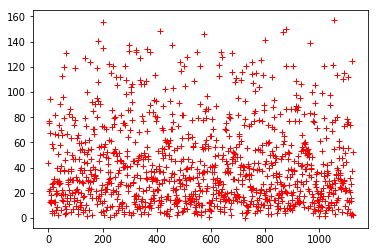

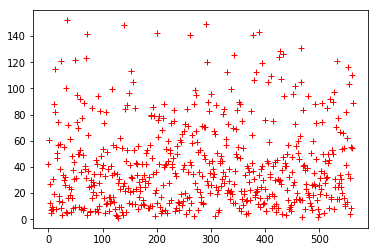

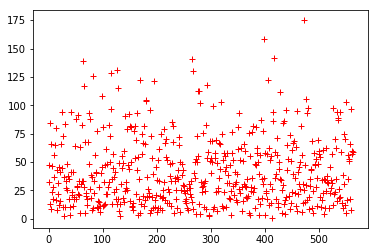

In [7]:
plt.plot(y_train, '+r')
plt.show()
plt.plot(y_valid, '+r')
plt.show()
plt.plot(y_test, '+r')
plt.show()

In [8]:
model = baseline_model(32, X_train.shape[1], 'mean_squared_error', 'adagrad')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 1126 samples, validate on 563 samples
Epoch 1/5000
1126/1126 [==============================] - 0s - loss: 2753.0036 - val_loss: 2594.1590
Epoch 2/5000
1126/1126 [==============================] - 0s - loss: 2608.6199 - val_loss: 2451.8798
Epoch 3/5000
1126/1126 [==============================] - 0s - loss: 2450.4007 - val_loss: 2300.3313
Epoch 4/5000
1126/1126 [==============================] - 0s - loss: 2291.1062 - val_loss: 2155.0957
Epoch 5/5000
1126/1126 [==============================] - 0s - loss: 2137.8825 - val_loss

1126/1126 [==============================] - 0s - loss: 173.1513 - val_loss: 182.4837
Epoch 158/5000
1126/1126 [==============================] - 0s - loss: 172.3854 - val_loss: 181.6891
Epoch 159/5000
1126/1126 [==============================] - 0s - loss: 171.6153 - val_loss: 180.8991
Epoch 160/5000
1126/1126 [==============================] - 0s - loss: 170.8697 - val_loss: 180.1159
Epoch 161/5000
1126/1126 [==============================] - 0s - loss: 170.1203 - val_loss: 179.3778
Epoch 162/5000
1126/1126 [==============================] - 0s - loss: 169.4060 - val_loss: 178.6325
Epoch 163/5000
1126/1126 [==============================] - 0s - loss: 168.6943 - val_loss: 177.8888
Epoch 164/5000
1126/1126 [==============================] - 0s - loss: 167.9817 - val_loss: 177.1666
Epoch 165/5000
1126/1126 [==============================] - 0s - loss: 167.2664 - val_loss: 176.4621
Epoch 166/5000
1126/1126 [==============================] - 0s - loss: 166.5824 - val_loss: 175.7717
Epoch

1126/1126 [==============================] - 0s - loss: 131.0753 - val_loss: 142.5437
Epoch 239/5000
1126/1126 [==============================] - 0s - loss: 130.7626 - val_loss: 142.2908
Epoch 240/5000
1126/1126 [==============================] - 0s - loss: 130.4536 - val_loss: 142.0218
Epoch 241/5000
1126/1126 [==============================] - 0s - loss: 130.1450 - val_loss: 141.7893
Epoch 242/5000
1126/1126 [==============================] - 0s - loss: 129.8348 - val_loss: 141.5365
Epoch 243/5000
1126/1126 [==============================] - 0s - loss: 129.5291 - val_loss: 141.2837
Epoch 244/5000
1126/1126 [==============================] - 0s - loss: 129.2311 - val_loss: 141.0322
Epoch 245/5000
1126/1126 [==============================] - 0s - loss: 128.9279 - val_loss: 140.7593
Epoch 246/5000
1126/1126 [==============================] - 0s - loss: 128.6315 - val_loss: 140.5520
Epoch 247/5000
1126/1126 [==============================] - 0s - loss: 128.3398 - val_loss: 140.3052
Epoch

1126/1126 [==============================] - 0s - loss: 107.8357 - val_loss: 124.4164
Epoch 401/5000
1126/1126 [==============================] - 0s - loss: 107.7801 - val_loss: 124.3708
Epoch 402/5000
1126/1126 [==============================] - 0s - loss: 107.7308 - val_loss: 124.3120
Epoch 403/5000
1126/1126 [==============================] - 0s - loss: 107.6732 - val_loss: 124.2746
Epoch 404/5000
1126/1126 [==============================] - 0s - loss: 107.6188 - val_loss: 124.2425
Epoch 405/5000
1126/1126 [==============================] - 0s - loss: 107.5719 - val_loss: 124.1972
Epoch 406/5000
1126/1126 [==============================] - 0s - loss: 107.5313 - val_loss: 124.1377
Epoch 407/5000
1126/1126 [==============================] - 0s - loss: 107.4757 - val_loss: 124.0751
Epoch 408/5000
1126/1126 [==============================] - 0s - loss: 107.4284 - val_loss: 123.9662
Epoch 409/5000
1126/1126 [==============================] - 0s - loss: 107.3821 - val_loss: 123.9109
Epoch

1126/1126 [==============================] - 0s - loss: 104.6380 - val_loss: 121.2714
Epoch 482/5000
1126/1126 [==============================] - 0s - loss: 104.6084 - val_loss: 121.2207
Epoch 483/5000
1126/1126 [==============================] - 0s - loss: 104.5775 - val_loss: 121.1877
Epoch 484/5000
1126/1126 [==============================] - 0s - loss: 104.5489 - val_loss: 121.1320
Epoch 485/5000
1126/1126 [==============================] - 0s - loss: 104.5219 - val_loss: 121.1016
Epoch 486/5000
1126/1126 [==============================] - 0s - loss: 104.4960 - val_loss: 121.0734
Epoch 487/5000
1126/1126 [==============================] - 0s - loss: 104.4654 - val_loss: 121.0004
Epoch 488/5000
1126/1126 [==============================] - 0s - loss: 104.4350 - val_loss: 120.9724
Epoch 489/5000
1126/1126 [==============================] - 0s - loss: 104.3998 - val_loss: 120.9370
Epoch 490/5000
1126/1126 [==============================] - 0s - loss: 104.3716 - val_loss: 120.9490
Epoch

1126/1126 [==============================] - 0s - loss: 101.2247 - val_loss: 116.5438
Epoch 644/5000
1126/1126 [==============================] - 0s - loss: 101.2053 - val_loss: 116.5277
Epoch 645/5000
1126/1126 [==============================] - 0s - loss: 101.1945 - val_loss: 116.4965
Epoch 646/5000
1126/1126 [==============================] - 0s - loss: 101.1838 - val_loss: 116.4988
Epoch 647/5000
1126/1126 [==============================] - 0s - loss: 101.1622 - val_loss: 116.4968
Epoch 648/5000
1126/1126 [==============================] - 0s - loss: 101.1527 - val_loss: 116.4479
Epoch 649/5000
1126/1126 [==============================] - 0s - loss: 101.1364 - val_loss: 116.4227
Epoch 650/5000
1126/1126 [==============================] - 0s - loss: 101.1197 - val_loss: 116.4221
Epoch 651/5000
1126/1126 [==============================] - 0s - loss: 101.1055 - val_loss: 116.4107
Epoch 652/5000
1126/1126 [==============================] - 0s - loss: 101.0899 - val_loss: 116.3858
Epoch

1126/1126 [==============================] - 0s - loss: 99.2067 - val_loss: 113.2271
Epoch 805/5000
1126/1126 [==============================] - 0s - loss: 99.1955 - val_loss: 113.2120
Epoch 806/5000
1126/1126 [==============================] - 0s - loss: 99.1870 - val_loss: 113.2038
Epoch 807/5000
1126/1126 [==============================] - 0s - loss: 99.1728 - val_loss: 113.1885
Epoch 808/5000
1126/1126 [==============================] - 0s - loss: 99.1667 - val_loss: 113.1898
Epoch 809/5000
1126/1126 [==============================] - 0s - loss: 99.1530 - val_loss: 113.1820
Epoch 810/5000
1126/1126 [==============================] - 0s - loss: 99.1464 - val_loss: 113.1617
Epoch 811/5000
1126/1126 [==============================] - 0s - loss: 99.1337 - val_loss: 113.1585
Epoch 812/5000
1126/1126 [==============================] - 0s - loss: 99.1203 - val_loss: 113.1779
Epoch 813/5000
1126/1126 [==============================] - 0s - loss: 99.1128 - val_loss: 113.1755
Epoch 814/5000


1126/1126 [==============================] - 0s - loss: 98.4055 - val_loss: 112.0050
Epoch 887/5000
1126/1126 [==============================] - 0s - loss: 98.3943 - val_loss: 111.9797
Epoch 888/5000
1126/1126 [==============================] - 0s - loss: 98.3835 - val_loss: 111.9870
Epoch 889/5000
1126/1126 [==============================] - 0s - loss: 98.3738 - val_loss: 111.9720
Epoch 890/5000
1126/1126 [==============================] - 0s - loss: 98.3721 - val_loss: 111.9555
Epoch 891/5000
1126/1126 [==============================] - 0s - loss: 98.3579 - val_loss: 111.9361
Epoch 892/5000
1126/1126 [==============================] - 0s - loss: 98.3524 - val_loss: 111.9259
Epoch 893/5000
1126/1126 [==============================] - 0s - loss: 98.3400 - val_loss: 111.8435
Epoch 894/5000
1126/1126 [==============================] - 0s - loss: 98.3348 - val_loss: 111.8278
Epoch 895/5000
1126/1126 [==============================] - 0s - loss: 98.3254 - val_loss: 111.8071
Epoch 896/5000


1126/1126 [==============================] - 0s - loss: 97.1047 - val_loss: 110.0216
Epoch 1049/5000
1126/1126 [==============================] - 0s - loss: 97.0949 - val_loss: 110.0013
Epoch 1050/5000
1126/1126 [==============================] - 0s - loss: 97.0923 - val_loss: 110.0018
Epoch 1051/5000
1126/1126 [==============================] - 0s - loss: 97.0813 - val_loss: 109.9891
Epoch 1052/5000
1126/1126 [==============================] - 0s - loss: 97.0685 - val_loss: 109.9639
Epoch 1053/5000
1126/1126 [==============================] - 0s - loss: 97.0623 - val_loss: 109.9421
Epoch 1054/5000
1126/1126 [==============================] - 0s - loss: 97.0548 - val_loss: 109.9476
Epoch 1055/5000
1126/1126 [==============================] - 0s - loss: 97.0486 - val_loss: 109.9380
Epoch 1056/5000
1126/1126 [==============================] - 0s - loss: 97.0452 - val_loss: 109.9125
Epoch 1057/5000
1126/1126 [==============================] - 0s - loss: 97.0346 - val_loss: 109.8941
Epoch 

1126/1126 [==============================] - 0s - loss: 96.0281 - val_loss: 108.2354
Epoch 1211/5000
1126/1126 [==============================] - 0s - loss: 96.0257 - val_loss: 108.2262
Epoch 1212/5000
1126/1126 [==============================] - 0s - loss: 96.0150 - val_loss: 108.2549
Epoch 1213/5000
1126/1126 [==============================] - 0s - loss: 96.0114 - val_loss: 108.2583
Epoch 1214/5000
1126/1126 [==============================] - 0s - loss: 96.0042 - val_loss: 108.2460
Epoch 1215/5000
1126/1126 [==============================] - 0s - loss: 96.0003 - val_loss: 108.2333
Epoch 1216/5000
1126/1126 [==============================] - 0s - loss: 95.9902 - val_loss: 108.2159
Epoch 1217/5000
1126/1126 [==============================] - 0s - loss: 95.9865 - val_loss: 108.2033
Epoch 1218/5000
1126/1126 [==============================] - 0s - loss: 95.9799 - val_loss: 108.1709
Epoch 1219/5000
1126/1126 [==============================] - 0s - loss: 95.9705 - val_loss: 108.1492
Epoch 

1126/1126 [==============================] - 0s - loss: 95.0160 - val_loss: 106.5935
Epoch 1373/5000
1126/1126 [==============================] - 0s - loss: 95.0071 - val_loss: 106.5831
Epoch 1374/5000
1126/1126 [==============================] - 0s - loss: 95.0030 - val_loss: 106.5727
Epoch 1375/5000
1126/1126 [==============================] - 0s - loss: 94.9993 - val_loss: 106.5474
Epoch 1376/5000
1126/1126 [==============================] - 0s - loss: 94.9921 - val_loss: 106.5474
Epoch 1377/5000
1126/1126 [==============================] - 0s - loss: 94.9865 - val_loss: 106.5510
Epoch 1378/5000
1126/1126 [==============================] - 0s - loss: 94.9793 - val_loss: 106.5386
Epoch 1379/5000
1126/1126 [==============================] - 0s - loss: 94.9760 - val_loss: 106.5250
Epoch 1380/5000
1126/1126 [==============================] - 0s - loss: 94.9687 - val_loss: 106.5203
Epoch 1381/5000
1126/1126 [==============================] - 0s - loss: 94.9620 - val_loss: 106.5043
Epoch 

1126/1126 [==============================] - 0s - loss: 94.0724 - val_loss: 105.2496
Epoch 1535/5000
1126/1126 [==============================] - 0s - loss: 94.0672 - val_loss: 105.2343
Epoch 1536/5000
1126/1126 [==============================] - 0s - loss: 94.0611 - val_loss: 105.2207
Epoch 1537/5000
1126/1126 [==============================] - 0s - loss: 94.0546 - val_loss: 105.2087
Epoch 1538/5000
1126/1126 [==============================] - 0s - loss: 94.0518 - val_loss: 105.1935
Epoch 1539/5000
1126/1126 [==============================] - 0s - loss: 94.0464 - val_loss: 105.1866
Epoch 1540/5000
1126/1126 [==============================] - 0s - loss: 94.0398 - val_loss: 105.1721
Epoch 1541/5000
1126/1126 [==============================] - 0s - loss: 94.0366 - val_loss: 105.1593
Epoch 1542/5000
1126/1126 [==============================] - 0s - loss: 94.0281 - val_loss: 105.1395
Epoch 1543/5000
1126/1126 [==============================] - 0s - loss: 94.0233 - val_loss: 105.1177
Epoch 

1126/1126 [==============================] - 0s - loss: 93.2294 - val_loss: 103.9203
Epoch 1696/5000
1126/1126 [==============================] - 0s - loss: 93.2247 - val_loss: 103.9069
Epoch 1697/5000
1126/1126 [==============================] - 0s - loss: 93.2158 - val_loss: 103.9059
Epoch 1698/5000
1126/1126 [==============================] - 0s - loss: 93.2123 - val_loss: 103.9041
Epoch 1699/5000
1126/1126 [==============================] - 0s - loss: 93.2093 - val_loss: 103.8797
Epoch 1700/5000
1126/1126 [==============================] - 0s - loss: 93.2034 - val_loss: 103.8684
Epoch 1701/5000
1126/1126 [==============================] - 0s - loss: 93.1977 - val_loss: 103.8689
Epoch 1702/5000
1126/1126 [==============================] - 0s - loss: 93.1949 - val_loss: 103.8714
Epoch 1703/5000
1126/1126 [==============================] - 0s - loss: 93.1869 - val_loss: 103.8588
Epoch 1704/5000
1126/1126 [==============================] - 0s - loss: 93.1815 - val_loss: 103.8639
Epoch 

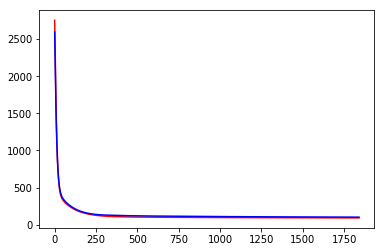

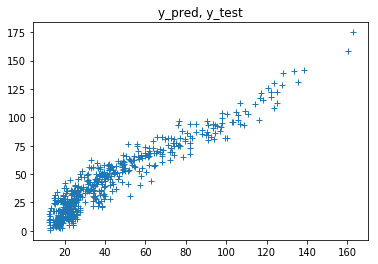

1.10148514851


In [9]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

## RNN

In [16]:
from keras.layers import SimpleRNN

df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df[['date', 'NO2_ref', 'NO2_61FD', 'NO2_61F0', \
        'NO2_61EF', 'temp', 'rh', 'tgrad', 'pressure', 'pluvio']]
df = df.reset_index()
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adagrad'):
    print(input_dim)
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=(24, 1, 8))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    #model.add(Dense(nb_units))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model


model = simple_rnn_model(16, X_train.shape)

SyntaxError: invalid syntax (<ipython-input-16-f3e4a7f862bb>, line 18)

In [17]:
#X_train = np.reshape(X_train, (1, X_train.shape[0], X_train.shape[1]))
print(X_train.shape)
X_train = np.reshape(X_train[:24], (24, 1, 8))
print(X_train.shape)
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=1126, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

(24, 1, 8)
(24, 1, 8)


ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (24, 1, 8)

In [ ]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

In [ ]:
X_train.shape